In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [2]:
df = pd.read_csv('homeprices.csv')
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [3]:
median_bedroom = math.floor(df['bedrooms'].median())
median_bedroom

4

In [4]:
df['bedrooms'] = df['bedrooms'].fillna(median_bedroom)

In [5]:
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [6]:
reg = lm.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [8]:
reg.intercept_

221323.00186540443

In [9]:
reg.predict([[3000, 4.0, 15]])

array([602590.07937407])

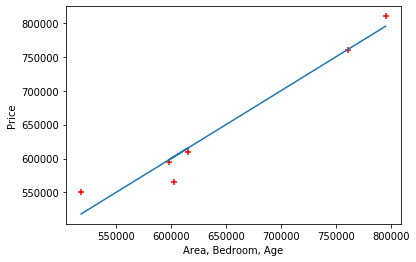

In [16]:
%matplotlib inline
plt.xlabel('Area, Bedroom, Age')
plt.ylabel('Price')
plt.scatter(((df['area']*reg.coef_[0]) + (df['bedrooms']*reg.coef_[1]) + (df['age']*reg.coef_[2] + reg.intercept_)), df['price'], marker = '+', color = 'red')
plt.plot(((df['area']*reg.coef_[0]) + (df['bedrooms']*reg.coef_[1]) + (df['age']*reg.coef_[2] + reg.intercept_)), reg.predict(df[['area', 'bedrooms', 'age']]))